# Summer 2022 Data Science Intern Challenge 


### Q1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
#Showing sample of dataset
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [2]:
# Checking to see if there is any NaN data
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [3]:
# Examining the problem with statiscal view
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


From our table above, we can see that the mean provided is \\$3145.128.

The max order_amount is \\$704000. However the 75th percentile is only \\$390, we can clearly say that we are dealing with some kind of outliners in this case. 

But we should notice that the order_amount scale with the number of items being sold, so we take a look at total_items, and it seems there is a large order being placed at store 42 place by 1 user_id.


In [4]:
# Let's take a look at those outliners
df.sort_values(by="order_amount",ascending =False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


In [20]:
AOV = df["order_amount"].sum()/df["total_items"].count()
print(AOV)

3145.128


It seems that our calculation using the sum of order_amount divided by the sum of total_items resulted in a more sane calculation.

But let's ignore all those 2000 total_items order and take a look at other store.

In [21]:
df.sort_values(by="order_amount",ascending =False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


It seems that store 42 has some interesting order_amount and total_items. Not only that there is 1 specific user keep doing that, therefore, it is most likely a bug or a scammed order.

Not only that, we can see that store 78 also has interesting order_amount that should not make sense.

Let's take a look at store 78 and store 42.
Then we will try to ignore these 2 stores to get the mean.

In [22]:
#Checking data fro
check_78 = df[df["shop_id"] == 78]
check_78

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


In [23]:
# Checking data from store 42
check_42 = df[df["order_amount"] == 704000]
check_42

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [24]:
# Collect data from those not store 78
newdf = df[df["shop_id"] != 78]
newdf

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [25]:
newdf.sort_values(by="order_amount",ascending =False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
...,...,...,...,...,...,...,...
1843,1844,92,987,90,1,debit,2017-03-06 7:01:09
4219,4220,92,747,90,1,credit_card,2017-03-25 20:16:58
2092,2093,92,986,90,1,debit,2017-03-04 6:44:05
4923,4924,92,965,90,1,credit_card,2017-03-09 5:05:11


In [26]:
# Collect data from those not store 42
new2df = newdf[newdf["shop_id"] != 42]
new2df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [27]:
new2df.sort_values(by="order_amount",ascending =False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
3538,3539,43,830,1086,6,debit,2017-03-17 19:56:29
4141,4142,54,733,1064,8,debit,2017-03-07 17:05:18
3077,3078,89,754,980,5,debit,2017-03-13 5:27:58
2494,2495,50,757,965,5,debit,2017-03-04 7:32:45
1563,1564,91,934,960,6,debit,2017-03-23 8:25:49
...,...,...,...,...,...,...,...
590,591,92,967,90,1,debit,2017-03-28 22:56:23
2092,2093,92,986,90,1,debit,2017-03-04 6:44:05
4183,4184,92,844,90,1,debit,2017-03-26 4:22:39
158,159,92,795,90,1,credit_card,2017-03-29 3:07:12


In [83]:
AOV = new2df["order_amount"].sum()/new2df["total_items"].count()
print("New AOV:",AOV)

New AOV: 300.1558229655313


We have new AOV that is \$300.15.

This mean is much more realistic than the other mean we achieve that contains store 42 and store 78. We should do a revision on the data collected from those store.

However, let's check other metric that is less susceptible to abnormalies like median.

In [84]:
# Let's check original median 
o_median = df["order_amount"].median()
print("Old Median:",o_median)


Old Median: 284.0


In [85]:
# Let's check median after excluding store 42 and 78 
n_median = df["order_amount"].median()
print("New Median:",n_median)

New Median: 284.0


In [86]:
# Let's check original mode
o_mode = df["order_amount"].mode()
print("Old Mode:",o_mode)

Old Mode: 0    153
dtype: int64


In [87]:
# Let's check mode after excluding store 42 and 78 
n_mode = df["order_amount"].mode()
print("New Mode:",n_mode)

New Mode: 0    153
dtype: int64


<AxesSubplot:>

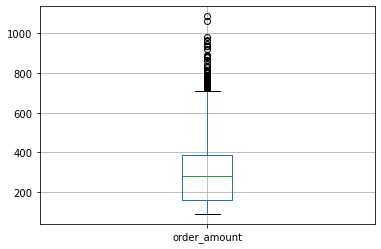

In [88]:
new2df.boxplot(column="order_amount")

<AxesSubplot:>

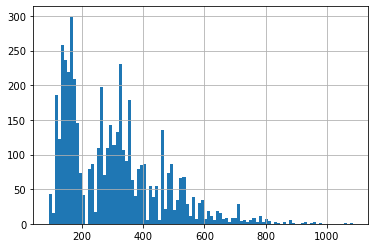

In [89]:
new2df["order_amount"].hist(bins=100)

It seems that using mode and median tell us much more information about overall value of order.

I believe we should us the median and mode for order_value to get how majority of store doing while limiting the effect of abnormalies like that of store 42 and store 78.